In [166]:
import torch
import torchvision
import torchvision.transforms as transform

In [167]:
train_set = torchvision.datasets.FashionMNIST(
    root= './data/FashionMNIST',
    train= True,
    download= True,
    transform= transform.Compose([
        transform.ToTensor()
    ])
)

In [168]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 10    
)

In [169]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [170]:
len(train_set)

60000

In [171]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [172]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [173]:
sample = next(iter(train_set))

In [174]:
len(sample)

2

In [175]:
type(sample)

tuple

In [176]:
image, label = sample

In [177]:
image.shape

torch.Size([1, 28, 28])

In [178]:
image.squeeze().shape

torch.Size([28, 28])

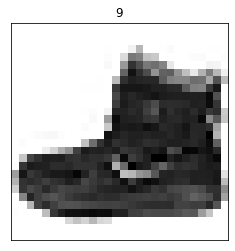

In [179]:
plt.imshow(image.squeeze(), cmap='gray_r')
plt.title(label)
plt.xticks([])
plt.yticks([])
plt.show()

In [180]:
batch = next(iter(train_loader))

In [181]:
len(batch)

2

In [182]:
type(batch)

list

In [183]:
images, labels = batch

In [184]:
images.shape

torch.Size([10, 1, 28, 28])

In [185]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


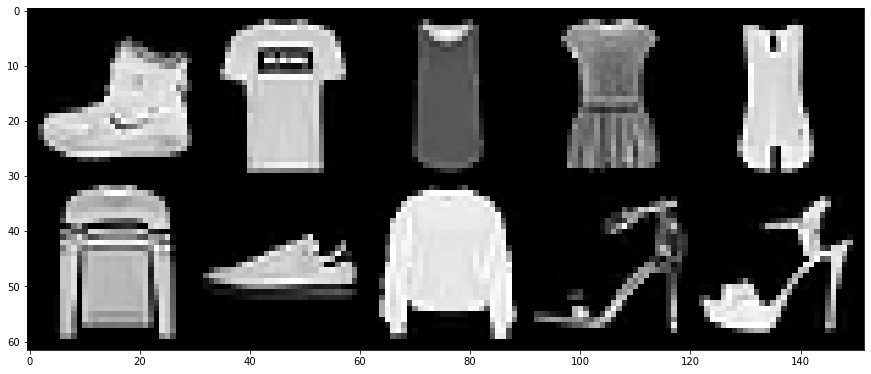

In [186]:
grid = torchvision.utils.make_grid(images, nrow=5)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

In [187]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = t

        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = t.reshape(-1,12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        t = self.fc2(t)
        t = F.relu(t)

        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [188]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [189]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [190]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [191]:
network.fc1.weight.shape

torch.Size([120, 192])

In [192]:
network.fc2.weight.shape

torch.Size([60, 120])

In [193]:
network.out.weight.shape

torch.Size([10, 60])

In [194]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [195]:
for name,param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [196]:
image.shape

torch.Size([1, 28, 28])

In [197]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [198]:
pred = network(image.unsqueeze(0))

In [199]:
pred

tensor([[ 0.1103,  0.0056, -0.0541,  0.0847,  0.0628,  0.1111, -0.0395, -0.0006, -0.1006, -0.0382]],
       grad_fn=<AddmmBackward0>)

In [200]:
pred.argmax(dim=1)

tensor([5])

In [201]:
label

9

In [202]:
F.softmax(pred, dim=1)

tensor([[0.1098, 0.0989, 0.0932, 0.1070, 0.1047, 0.1099, 0.0945, 0.0983, 0.0889, 0.0947]], grad_fn=<SoftmaxBackward0>)

In [203]:
F.softmax(pred, dim=1).sum()

tensor(1., grad_fn=<SumBackward0>)

In [204]:
preds = network(images)

In [205]:
preds

tensor([[ 0.1103,  0.0056, -0.0541,  0.0847,  0.0628,  0.1111, -0.0395, -0.0006, -0.1006, -0.0382],
        [ 0.1023,  0.0093, -0.0536,  0.0886,  0.0593,  0.1048, -0.0435,  0.0064, -0.0965, -0.0442],
        [ 0.1078,  0.0103, -0.0556,  0.0829,  0.0586,  0.1057, -0.0411, -0.0016, -0.0985, -0.0353],
        [ 0.1067,  0.0107, -0.0533,  0.0827,  0.0578,  0.1086, -0.0404,  0.0008, -0.0980, -0.0372],
        [ 0.1060,  0.0081, -0.0552,  0.0831,  0.0606,  0.1089, -0.0392,  0.0001, -0.1019, -0.0393],
        [ 0.1090,  0.0076, -0.0573,  0.0884,  0.0551,  0.1170, -0.0401,  0.0022, -0.1009, -0.0421],
        [ 0.1124,  0.0099, -0.0511,  0.0830,  0.0699,  0.1121, -0.0432,  0.0006, -0.0951, -0.0335],
        [ 0.1179,  0.0093, -0.0533,  0.0794,  0.0611,  0.1184, -0.0425, -0.0071, -0.1003, -0.0314],
        [ 0.1113,  0.0063, -0.0549,  0.0808,  0.0600,  0.1148, -0.0373, -0.0012, -0.0974, -0.0320],
        [ 0.1145,  0.0039, -0.0509,  0.0870,  0.0600,  0.1102, -0.0351, -0.0022, -0.0945, -0.0373]],

In [206]:
preds.argmax(dim=1)

tensor([5, 5, 0, 5, 5, 5, 0, 5, 5, 0])

In [207]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [208]:
preds.argmax(dim=1).eq(labels)

tensor([False, False,  True, False, False, False, False, False,  True, False])

In [209]:
preds.argmax(dim=1).eq(labels).sum()

tensor(2)

In [210]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum()

In [211]:
get_num_correct(preds, labels)

tensor(2)